<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
display(data.columns.tolist())

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

### Вывод

Данные из изначального датафрейма требуют предобработки, а именно: замену пропусков подходящими значениями, где это возможно, изменения типа данных для уменьшения занимаемой памяти и облегчения дальнейшей работы с данными, унификации дат, замены названия локаций на имена собственные (без указания типа населенного пункта).
**Обратить внимание**: было выявлено, что несколько колонок не попадают в визуализацию данных через display(). Полный список колонок удалось увидеть через tolist().  
Данных достаточно для проведения исследовательского анализа данных. 

## Предобработка данных

Проверим уникальные значения количества фотографий для каждого объявления **total_images**

In [5]:
print(data['total_images'].unique())

[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]


Данные по числу фотографий квартиры в объявлении выглядят правдоподобно. Пропусков нет, как видно из ранее проведенного обзора датафрейма.  

Проверим колонку с ценой на момент снятия с публикации **last_price** на пропуски.

In [6]:
print(len(data[data['last_price'].isna()]))

0


Пропусков нет. Изменим тип данных на целочисленные для оптимизации памяти необходимой для хранения данных. Цена в копейках для анализа данных будет излишней. 

In [7]:
data['last_price'] = data['last_price'].astype('int')

Проверим наибольшее и наименьшее значение цены на момент снятия.

In [8]:
print(data['last_price'].min(),data['last_price'].max())

12190 763000000


Стоимость квартиры в 12190 RUR выглядит неправдоподобно. Отсортируем данные по возрастанию для проверки количества объявлений с явно заниженной ценой. 

In [9]:
display(data.sort_values('last_price').head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


Неправдоподобно низкая цена квартиры указана только в одном объявлении. Очевидно, это ошибка при формировании датасета. Удалим это объявление из датасета и проверим успешност удаления. 

In [10]:
data = data.loc[data['last_price'] != 12190]
print(data['last_price'].min())

430000


Теперь нижняя граница цен выглядит адекватно. 

Изучим общую площадь квартир из объявлений **total_area**.

In [11]:
data['total_area'].describe()

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

In [12]:
really_big_flat = data[data['total_area'] == 900.0]
display(really_big_flat)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Видимо, 12-комнатная квартира действительно может иметь площадь 900м2. Изменения не вносим. 

Унифицируеми запись даты и изменим тип данных с **object** на **datetime**

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D')

In [14]:
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [15]:
current_day = pd.to_datetime(datetime.now().date())
data['days_exposition'] = data['days_exposition'].fillna((current_day-data['first_day_exposition']).dt.days)
data['days_exposition'] = data['days_exposition'].astype('int')

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,1248
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Дата публикации **first_day_exposition** приняла унифицированный формат.
Пропуски в числе дней с размещения объявления (от публикации до снятия) **days_exposition** заполнены.
Очевидно, что эти пропуски свидетальстовали о том, что объявление еще активно на текущий момент. Наличие числа дней указывало на то, что объявление закрыто.  

Изучим уникальное число комнат в объявлениях **rooms**.

In [16]:
print(data['rooms'].unique())

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


In [17]:
display(data[data['rooms'] == 0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181
349,4,2320000,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45
440,8,2480000,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64
508,0,3375000,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430
608,2,1850000,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14
23442,0,2500000,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4
23554,15,3350000,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31
23592,10,1450000,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82


Нулевое число комнат предположительно указывает на то, что квартира является студией. 
Проверим 19-ти комнатную квартиру.

In [18]:
display(data[data['rooms'] == 19])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000,374.6,2018-06-09,19,NaN,5.0,264.5,2,NaN,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114


ОК, красиво жить не запретишь. Почти 400-метровая квартира может быть разбита на 19 комант. Оставляем данные без изменения. 

Проверим высоту колонку с высотой потолков **ceiling_height**.

In [19]:
data['ceiling_height'].describe()

count    14503.000000
mean         2.771500
std          1.261099
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [20]:
print(len(data[data['ceiling_height'].isna()]))

9195


Если бы нам были известны адреса, то мы бы сгруппировали данные по ним и взяли бы медианные значения по дому.
У нас нет возможности сгруппировать по адресу, поэтому не зашумляем данные и оставляем пропуски незаполненными. 

In [21]:
data.loc[(data['ceiling_height']<2.5)|(data['ceiling_height']>4.5),'ceiling_height']=data['ceiling_height'].median()
data['ceiling_height'].describe()

count    14503.000000
mean         2.725789
std          0.266751
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.500000
Name: ceiling_height, dtype: float64

Неправдоподобно низкие и высокие потолки заменим медианным значением по датасету. 

Изучим общее число этажей в доме **floors_total**.

In [22]:
data['floors_total'].describe()

count    23612.000000
mean        10.673217
std          6.596654
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [23]:
print(len(data[data['floors_total'].isna()]))

86


Данные не заполнены для 86 объявлений. Оставим пропуски незаполненными, так как мы не располагаем адресами объявлений, а значит не можем сгруппировать данные по адресам и проверить этажность зданий. Число пропусков незначительно, а потому их наличие некритично для проведения исследовательского анализа датасета. 

Изучим жилую площадь помещений **living_area**.

In [24]:
data['living_area'].describe()

count    21795.000000
mean        34.457965
std         22.030944
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Сгруппируем данные по общей площади помещений и заполним пропуски медианным значением жилой площади. 

In [25]:
living_area_transformed = data.groupby('total_area')['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(living_area_transformed)

Изучим колонку с номером этажа квартиры, для которой размещено объявление **floor**.

In [26]:
print(data['floor'].unique())

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]


In [27]:
display(data.loc[(data['floors_total'])-(data['floor'])<0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Мы сделали внутренню проверку, сравнив этаж квартиры и общее число этажей в здании. Внутренних противоречий не обнаружили. Идем дальше. 

Изучим проверку, является ли квартира апартаментами **is_apartment**.

In [28]:
print(data['is_apartment'].unique())

[nan False True]


In [29]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].unique())

[False  True]


Провели замену пропусков на **False**, сделав предположение, что автор объявления забыл указать то, что квартира не является апартаментами. 

Проверим колонку с данными, является ли квартира студией **studio**, на аномалии.

In [30]:
print(data['studio'].unique())

[False  True]


Сделаем аналогичную проверку колонки с проверкой на факт свободной планировки **open_plan**

In [31]:
print(data['open_plan'].unique())

[False  True]


В обоих случаях данные в порядке, внесение изменений не требуется. 

Проверим колонку с площадью кухонь **kitchen_area** на пропуски и аномалии. 

In [32]:
data['kitchen_area'].describe()

count    21420.000000
mean        10.568410
std          5.902034
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Заполним пропуски медианным значением площади кухонь в зависимости от общей площади квартир. 

In [33]:
kitchen_area_transformed = data.groupby('total_area')['kitchen_area'].transform('median')
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_transformed)

Сделаем внутреннюю проверку на соответствие утверждения: сумма площади кухни и жилой площадки должна быть менее общей площади квартиры. 

In [34]:
display(len(data.loc[(data['kitchen_area'])+(data['living_area'])>(data['total_area'])]))

121

In [35]:
data = data.loc[(data['kitchen_area'])+(data['living_area'])<=(data['total_area'])]

In [36]:
display(len(data.loc[(data['kitchen_area'])+(data['living_area'])>(data['total_area'])]))

0

К сожалению, 121 объявление не прошло проверку. Удалим эти объявления, чтобы они не зашумляли датасет.

Проверим число балконов в колонке **balcony** на пропуски и аномалии.

In [37]:
data['balcony'].describe()

count    11967.000000
mean         1.146820
std          1.070514
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [38]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

Заполним пропуски нулевым числом балконов, так как, очевидно, факт их наличия был бы указан в объявлениях. При их отсутствии, видимо, строчку объявления просто оставляли пустой. 

Унифицируем способ записи названия населенных пунктов **locality_name**.

In [39]:
locality_upd = data['locality_name'].dropna().unique().tolist()
locality_upd_sorted = sorted(locality_upd)
display(locality_upd_sorted)

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [40]:
def renaming_func(name):
    if pd.isna(name):
        return name
    new_name=[]
    for word in name.split():
        if word[0].isupper():
            new_name.append(word)
    return ' '.join(new_name)

print(renaming_func('деревня Лаголово'))
print(renaming_func('Санкт-Петербург'))
print(renaming_func('садоводческое некоммерческое товарищество Лесная Поляна'))

Лаголово
Санкт-Петербург
Лесная Поляна


In [41]:
data['locality_name'] = data['locality_name'].apply(renaming_func)
locality_upd = data['locality_name'].dropna().unique().tolist()
locality_upd_sorted = sorted(locality_upd)
display(locality_upd_sorted)

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

In [42]:
print(len(data[data['locality_name'].isna()]))

49


In [43]:
data = data.dropna(subset=['locality_name']) 
print(len(data[data['locality_name'].isna()]))

0


Мы исправили запись названий населенных аунктов, а также дропнули объявления без названий населенных пунктов. Ввиду отсутствия адресов заполнить эти пропуски мы бы не смогли. 

Проверим данные из **airports_nearest** на аномалии и пропуски. 

In [44]:
data['airports_nearest'].describe()

count    17839.000000
mean     28793.078424
std      12647.904428
min          0.000000
25%      18554.500000
50%      26736.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [45]:
display(data.sort_values('airports_nearest').head())
print(len(data[data['airports_nearest'].isna()]))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,...,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60
4017,7,2268000,35.0,2017-12-21,1,NaN,9.0,14.0,6,False,...,8.0,0,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,25
12899,8,4199000,56.0,2017-12-21,2,NaN,9.0,27.0,5,False,...,15.0,0,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,24
7778,9,2750000,29.0,2017-02-19,1,2.5,4.0,15.0,1,False,...,6.0,0,Санкт-Петербург,6914.0,21486.0,1.0,215.0,0.0,NaN,43
23150,3,6490000,62.5,2015-03-18,2,NaN,24.0,33.5,15,False,...,9.0,4,Санкт-Петербург,6949.0,13165.0,1.0,711.0,0.0,NaN,917


5394


In [46]:
airports_nearest_transformed = data.groupby('locality_name')['airports_nearest'].transform('median')
data['airports_nearest'] = data['airports_nearest'].fillna(airports_nearest_transformed)
data.loc[(data['airports_nearest'] == 0),'airports_nearest'] = airports_nearest_transformed
print(len(data[data['airports_nearest'].isna()]))

4770


Мы сгруппировали данные по населенному пункту и заменили расстояния до ближайших аэропортов на медианное значение по населенному пункту. Пропуски оставили без изменений. 

Аналогичную проверку, группировку и замену медианным значением проведем для расстояния до центра города **cityCenters_nearest**.

In [47]:
data['cityCenters_nearest'].describe()

count    17862.000000
mean     14221.680047
std       8624.674308
min        181.000000
25%       9268.000000
50%      13114.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [48]:
cityCenters_nearest_transformed = data.groupby('locality_name')['cityCenters_nearest'].transform('median')
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(cityCenters_nearest_transformed)
print(len(data[data['cityCenters_nearest'].isna()]))

4770


Изучим колонку с числом парков в радиусе 3 км **parks_around3000** на аномалии и пропуски. 

In [49]:
data['parks_around3000'].describe()

count    17863.000000
mean         0.610984
std          0.801470
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [50]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype('int')

Заменим пропуски на ноль, так как, видимо, авторы объявлений, чьи квартиры не расположены поблизости от парков, не указали число парков в объявлениях. 

In [51]:
data['parks_nearest'].describe()

count    7939.000000
mean      490.055549
std       339.553012
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [52]:
print(data.loc[(data['parks_around3000'] > 0), 'parks_around3000'].count())
print(data.loc[(data['parks_nearest'] > 0), 'parks_nearest'].count())
print(
    data.loc[(data['parks_around3000'] > 0)&(data['parks_nearest'].isna()), 'parks_around3000'].count()
)

7935
7939
0


Изучим колонку с числом водоемов в радиусе 3 км **ponds_around3000** на аномалии и пропуски. 

In [53]:
data['ponds_around3000'].describe()

count    17863.000000
mean         0.764709
std          0.935080
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [54]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

Логика замены пропусков аналогична той, что мы использовали при проверке на число парков в радиусе 3 км. 

In [55]:
data['ponds_nearest'].describe()

count    8908.000000
mean      518.963965
std       277.636587
min        13.000000
25%       294.000000
50%       503.000000
75%       731.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [56]:
print(data.loc[(data['ponds_around3000'] > 0), 'ponds_around3000'].count())
print(data.loc[(data['ponds_nearest'] > 0), 'ponds_nearest'].count())
print(
    data.loc[(data['ponds_around3000'] > 0)&(data['ponds_nearest'].isna()), 'ponds_around3000'].count()
)

8908
8908
0


Убедились, что если расстояние внесено в **ponds_nearest**, то и число водоемов в радиусе 3 км **ponds_around3000** тоже внесено, а значит нет очевидных зацепок для заполнения пропусков в ponds_nearest.

Изучим датафрейм на наличие дубликатов. Обновим индексы объявлений. Еще раз сделаем обзор датафрейма. 

In [57]:
print('Дубликатов в таблице:', data.duplicated().sum())

Дубликатов в таблице: 0


In [58]:
data.reset_index(drop=True, inplace=True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23233 entries, 0 to 23232
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23233 non-null  int64         
 1   last_price            23233 non-null  int64         
 2   total_area            23233 non-null  float64       
 3   first_day_exposition  23233 non-null  datetime64[ns]
 4   rooms                 23233 non-null  int64         
 5   ceiling_height        14306 non-null  float64       
 6   floors_total          23168 non-null  float64       
 7   living_area           23233 non-null  float64       
 8   floor                 23233 non-null  int64         
 9   is_apartment          23233 non-null  bool          
 10  studio                23233 non-null  bool          
 11  open_plan             23233 non-null  bool          
 12  kitchen_area          23233 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Добавим стоимость 1 м2. Преобразуем данные в целочисленные значения.

In [60]:
data['one_meter_cost']=(data['last_price']/data['total_area']).astype('int')

Добавим колонки с днем недели, месяцем и годом публикации объявлений. 

In [61]:
data['exposition_day_name'] = data['first_day_exposition'].dt.weekday
data['exposition_day_month'] = data['first_day_exposition'].dt.month
data['exposition_day_year'] = data['first_day_exposition'].dt.year

Добавим колонку со сгруппированными данными по этажам: 1 этаж, последний этаж, другие. 

In [62]:
def ap_floor_category(row):
    if row ['floor'] == 1:
        return 'первый'
    elif row ['floor'] == row ['floors_total']:
        return 'последний'
    else:
        return 'другой'
 
data['floor_category'] = data.apply(ap_floor_category, axis=1)

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_cost,exposition_day_name,exposition_day_month,exposition_day_year,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,1248,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0,NaN,0,NaN,81,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1,90.0,2,574.0,558,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,95.0,9,False,...,2,84.0,3,234.0,424,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2,112.0,1,48.0,121,100000,1,6,2018,другой


Добавим колонки с отношением жилой площади к общей площади и площади кухни к общей площади. 

In [63]:
data['living_to_total'] = data['living_area']/data['total_area']
data['kitchen_to_total'] = data['kitchen_area']/data['total_area']

Повторно изучим данные после добавления колонок. 

In [64]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,one_meter_cost,exposition_day_name,exposition_day_month,exposition_day_year,floor_category,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,1248,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2,574.0,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,95.0,9,False,...,3,234.0,424,408176,4,7,2015,другой,0.597484,0.094340
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121,100000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков.
Построим гистограммы и сделаем выводы. 

<AxesSubplot:>

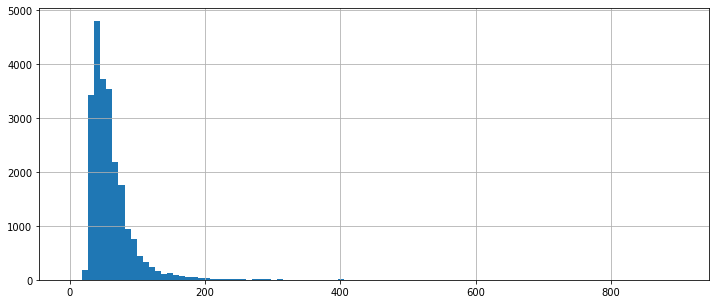

In [65]:
data['total_area'].hist(bins = 100, range = (0, data['total_area'].max()), figsize = (12,5))

Сконцентрируемся на том диапазоне, куда попадает наибольшее число объявлений (до 300м2). 
Остальной хвост неинформативен и зашумляет график. 

<AxesSubplot:>

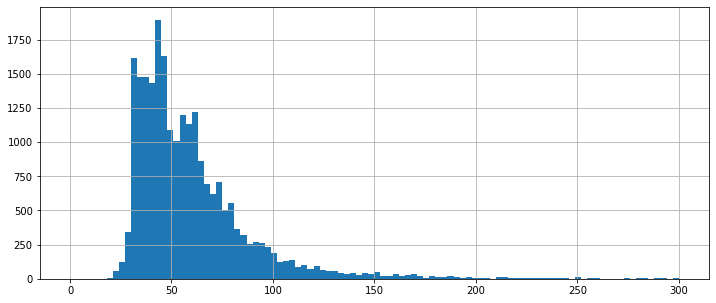

In [66]:
data['total_area'].hist(bins = 100,range = (0, 300), figsize = (12,5))

**Вывод по площади**: наибольшее число объявлений предлагают квартиры площадью 40 м2. Чуть меньше размещают квартиры площадью 30м2 и 60м2. Квартир площадью менее 30м2 практически нет в выборке. Квартиры площадью более 60м2 все меньше по мере увеличения площади квартиры. 

<AxesSubplot:>

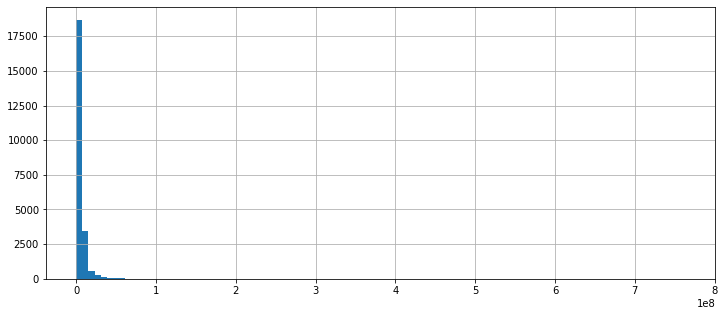

In [67]:
data['last_price'].hist(bins = 100,range = (0, data['last_price'].max()), figsize = (12,5))

Обрежем неинформативный хвост. 

<AxesSubplot:>

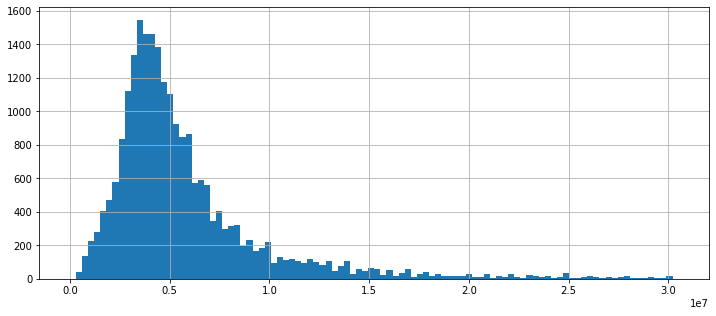

In [68]:
data['last_price'].hist(bins = 100, grid = True, range = (0, data['last_price'].max()/25), figsize = (12,5))

In [69]:
data['last_price'].describe()

count    2.323300e+04
mean     6.484869e+06
std      1.060379e+07
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

**Вывод по ценам**: наибольшее число объявлений размещено в ценовом диапазоне от 2 до 7 млн руб. По мере роста цен на квартиры количество объявлений постепенно уменьшается. 

<AxesSubplot:>

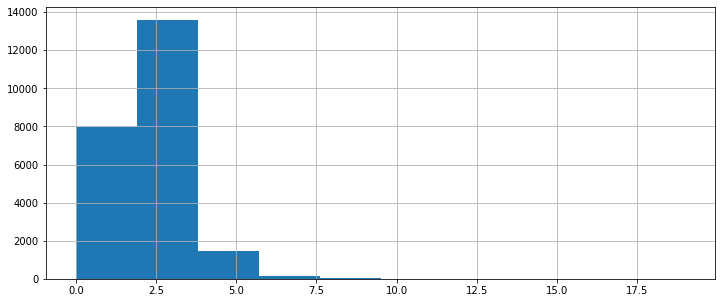

In [70]:
data['rooms'].hist(range = (0, data['rooms'].max()), figsize = (12,5))

Обрежем неинформативный хвост. 

<AxesSubplot:>

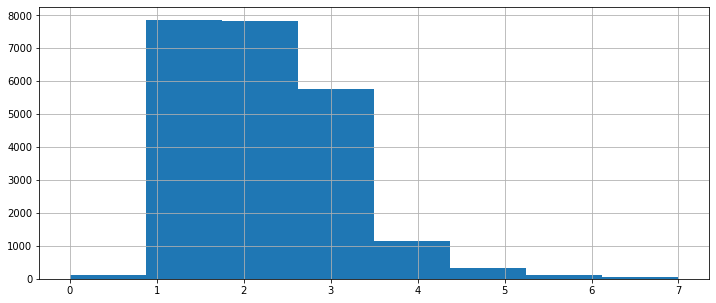

In [71]:
data['rooms'].hist(bins = 8, range = (0, 7), figsize = (12,5))

**Вывод по количеству комант**: наибольшее число объявлений размещено для 1- и 2- комнатных квартир (примерно по 8 тысяч), 3- комнатные квартиры представлены на рынку чуть меньше (почти 6 тысяч), остальных вариантов на порядок меньше. 

<AxesSubplot:>

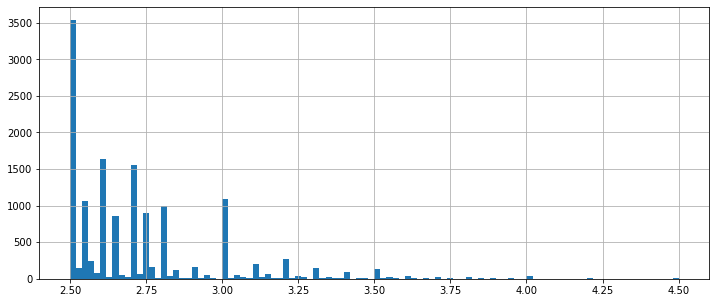

In [72]:
data['ceiling_height'].hist(bins = 100, figsize = (12,5))

Обрежем неинформативный хвост. 

<AxesSubplot:>

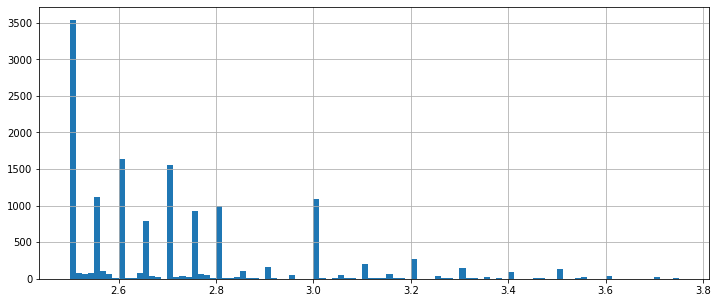

In [73]:
data['ceiling_height'].hist(bins = 100, range = (2.5, 3.75), figsize = (12,5))

**Вывод по высоте потолков**: наибольшее число объявлений размещено для квартир с высотой потолка 2,5м (3,5 тысячи). Так же в датафрейме представлено значительное число квартир с высотой потолка 2,6м и 2,7м (по 1,5 тысячи), а также 3м (1 тысяча). Объявления квартир с высотой потолка 2,8м также популярны, но следует помнить, что мы делали замену нестандартных значений на медиану, которая также составляла 2,8м, поэтому такая высота потолков не так популярна, как может показаться на графике. 

<AxesSubplot:>

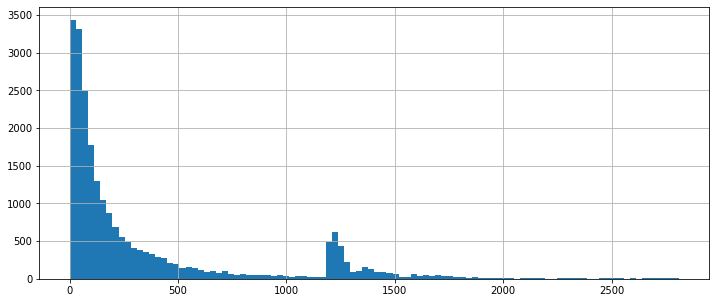

In [74]:
data['days_exposition'].hist(bins=100, figsize = (12,5))

Обрежем неинформативный хвост, зашумляющий гистограмму. Изучим ближе два пиковых значения, разбросанные по разных частях гистограммы. 

<AxesSubplot:>

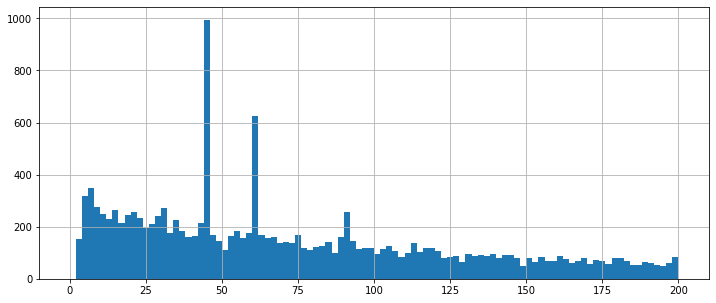

In [75]:
data['days_exposition'].hist(bins = 100, range = (0,200), figsize = (12,5))

<AxesSubplot:>

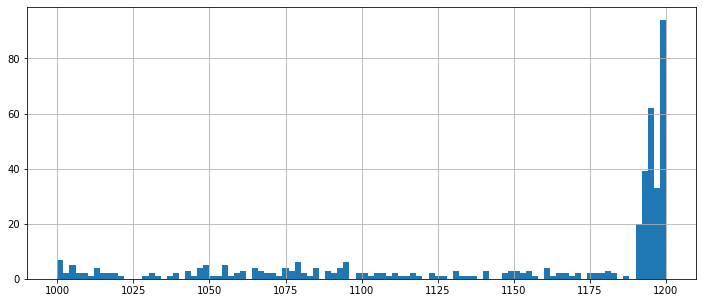

In [76]:
data['days_exposition'].hist(bins = 100, range = (1000,1200), figsize = (12,5))

Можно сделать вывод, что объявления по истечению 45, 60 и 90 дней автоматически удаляются. По всей видимости, это вязано с принципом работы площадки для размещения объявлений. Удалим эти искусственные пики. Кроме того, обрежем хвост, содержащий еще одно пиковое значение: он соответствует 3-м годам и, видимо, также подчинен принципу работы площадки.  Кроме того, сложно предположить, что объявления, размещенные более 3-х лет назад, все еще актуальны. 

<AxesSubplot:ylabel='Frequency'>

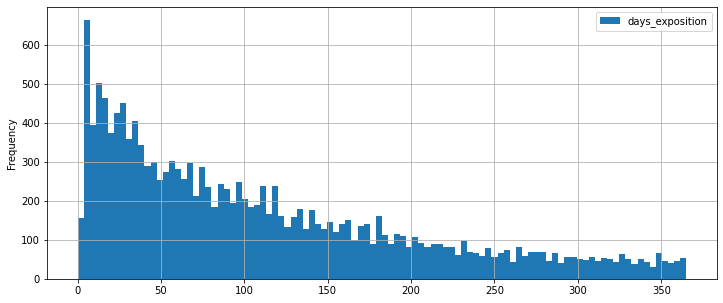

In [77]:
days_exposition_new = data.query(
    'days_exposition<(365*3) and days_exposition != 45 and days_exposition != 60 and days_exposition != 90'
)
days_exposition_new.plot(y ='days_exposition', kind  = 'hist', bins = 100, grid = True, range = (0,365), figsize = (12,5))

In [78]:
days_exposition_new['days_exposition'].describe()

count    18352.000000
mean       182.600044
std        202.951478
min          1.000000
25%         41.000000
50%        109.000000
75%        246.000000
max       1094.000000
Name: days_exposition, dtype: float64

**Вывод по длительности размещения объявлений**: в среднем, объявления висят 233 дня, медиана - 119 дней. Норма для продажи квартиры - 119 дней, быстро - до 44 дней, медленно - дольше 296 дней. 50% объявлений попадают в диапазон от 44 до 294 дней. 

Изучим, какие факторы больше всего влияют на стоимость квартиры, зависит ли цена от площади, числа комнат, удалённости от центра. Также изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, и зависимость от даты размещения: дня недели, месяца и года.

Рассмотрим зависимость цены квартиры от ее общей площади. 

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

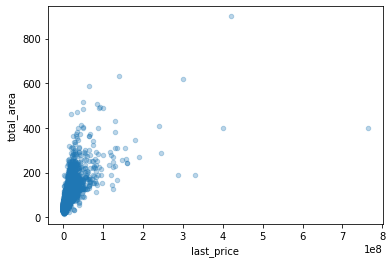

In [79]:
data.plot(x ='last_price',y ='total_area',kind ='scatter',alpha = 0.3)

Обрежем неинформативный хвост, в который попадает мало значений. 

0.64320988929939


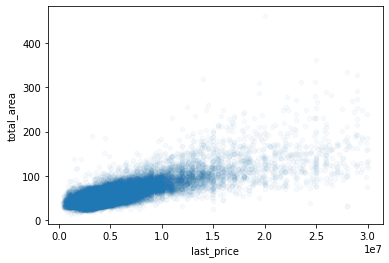

In [80]:
(
    data.query('last_price<30000000')
    .plot(x ='last_price',y ='total_area',kind ='scatter',alpha=0.03)
)
print(data['last_price'].corr(data['total_area']))

**Вывод**: корреляция между площадью квартиры и ее ценой существует, сила связи умеренная, зависимость прямая.

Рассмотрим зависимость цены квартиры от числа комнат. 

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

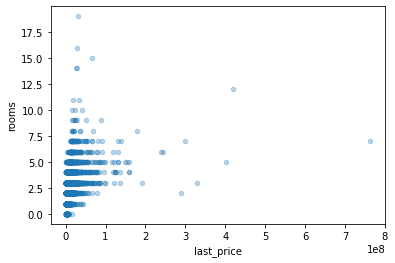

In [81]:
data.plot(x ='last_price',y ='rooms',kind = 'scatter', alpha = 0.3)

Обрежем неинформативный хвост, в который попадает мало значений. 

0.3585440902840736


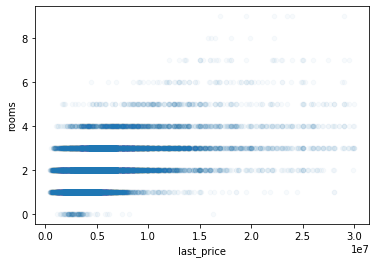

In [82]:
(
    data.query('last_price<30000000 & rooms<10')
    .plot(x ='last_price',y ='rooms',kind = 'scatter', alpha = 0.03)
)
print(data['last_price'].corr(data['rooms']))

**Вывод**: корреляция между числом комнат в квартире и ее ценой практически не выражена, сила связи очень слабая, зависимость прямая.

Рассмотрим зависимость цены квартиры от расстояния до центра города. 

<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

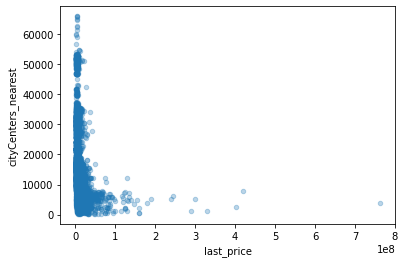

In [83]:
data.plot(x ='last_price',y ='cityCenters_nearest',kind = 'scatter', alpha = 0.3)

Как обычно, обрежем неинформативный хвост с малым числом значений. 

-0.21120595527442723


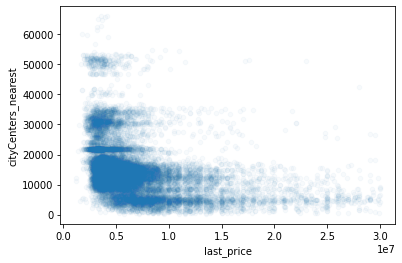

In [84]:
(
    data.query('last_price<30000000')
    .plot(x ='last_price',y ='cityCenters_nearest',kind = 'scatter', alpha = 0.03)
)
print(data['last_price'].corr(data['cityCenters_nearest']))

**Вывод**: корреляция между расстоянием квартиры от центра города и ее ценой практически отсутствует, сила связи очень слабая/ отсутствует, зависимость обратная.

Рассмотрим зависимость цены квартиры от этажа, на котором она расположена (первый, последний, другой). 

(0.0, 30000000.0)

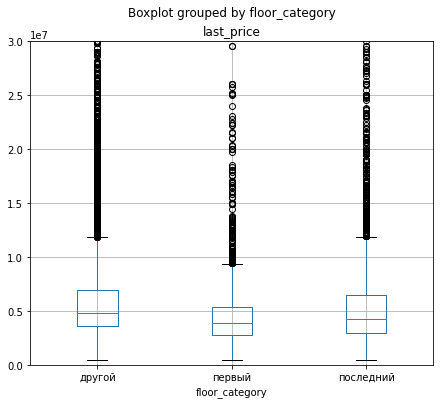

In [85]:
warnings.filterwarnings('ignore')

data_no_luxery = data.query('last_price<30000000')
data_no_luxery.boxplot('last_price', by ='floor_category', figsize = (7,6))
plt.ylim(0,30000000)

**Вывод**: квартиры на первом этаже самые дешевые (от 2,5 до 5 млн RUR, медиана - 4 млн RUR), на последнем - чуть дороже (от 3 до 6,5 млн RUR, медиана - 4,5 млн RUR). Квартиры, расположенные не на первом/ последнем этажах дороже (от 4 до 7 млн RUR, медиана - 5 млн RUR)

Рассмотрим зависимость цены квартиры от дня недели размещения объявления. 

(0.0, 30000000.0)

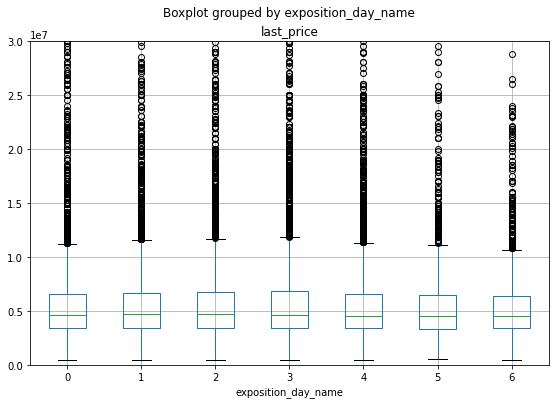

In [86]:
data_no_luxery = data.query('last_price<30000000')
data_no_luxery.boxplot('last_price', by ='exposition_day_name', figsize = (9,6))
plt.ylim(0,30000000)

**Вывод**: день размещения объявления практически не влияет на цену квартиры, но объявления на менее дешевые квартиры размещали в воскресенье, а на более дорогие - во вторник.

Рассмотрим зависимость цены квартиры от месяца размещения объявления. 

(0.0, 30000000.0)

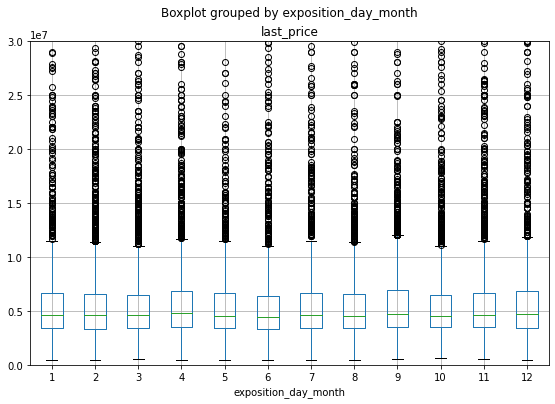

In [87]:
data_no_luxery = data.query('last_price<30000000')
data_no_luxery.boxplot('last_price', by ='exposition_day_month', figsize = (9,6))
plt.ylim(0,30000000)

**Вывод**: более дорогие квартиры размещали в апреле и декабре (5 млн RUR), а менее дорогие - в июне и августе (4,8 млн RUR). 

Рассмотрим зависимость цены квартиры от года размещения объявления. 

(0.0, 30000000.0)

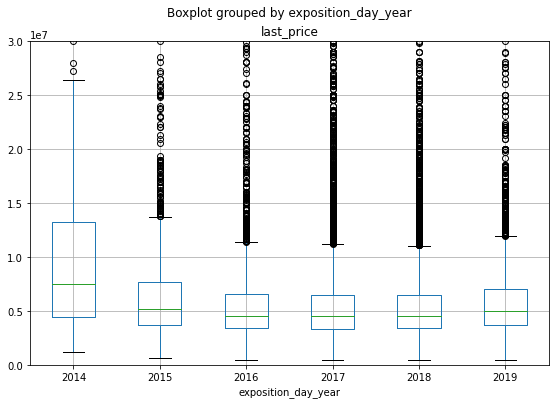

In [88]:
data_no_luxery = data.query('last_price<30000000')
data_no_luxery.boxplot('last_price', by ='exposition_day_year', figsize = (9,6))
plt.ylim(0,30000000)

**Вывод**: объявления на, в среднем, самые дорогие квартиры, размещались в 2014 году. Далее из года в год размещались объявления на все менее дорогие квартиры, и только в 2019 году тренд изменился, и цены в объявлениях пошли вверх. 

In [89]:
top_10 = data['locality_name'].value_counts().head(10).index

Изучим объявления из топ-10 по количеству объявлений населенных пунктов.

(0.0, 150000.0)

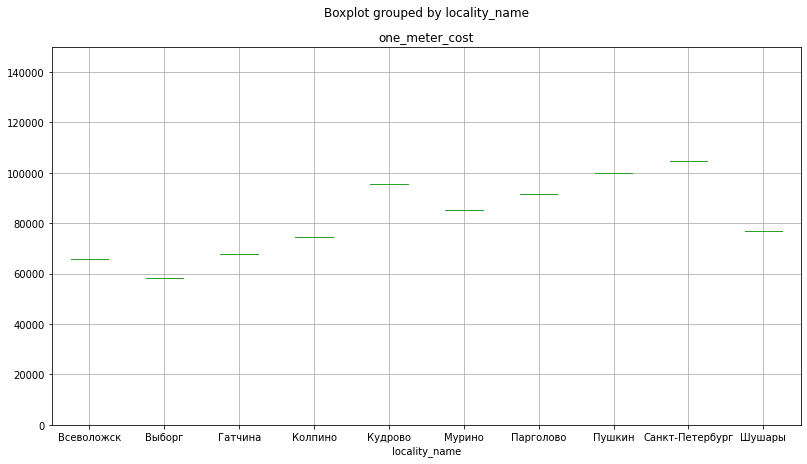

In [90]:
top_10_details = (
    data
    .query('locality_name in @top_10')
    .pivot_table(index ='locality_name', values = 'one_meter_cost', aggfunc = 'median')
)
    
top_10_details.boxplot('one_meter_cost', by ='locality_name', figsize = (13,7))
plt.ylim(0,150000)

**Вывод**: цена 1м2 квартир в Санкт-Петербурге наиболее высокая и составляет, в среднем, 104591 RUR/1м2. На втором месте - Пушкин (99993 RUR/1м2). Бронза у Кудрово (95675 RUR/1м2). Самый дешевый квадратный метр в Выборге (58232 RUR/1м2).

Выделим квартиры, которые можно отнести к центру Санкт-Петербурга. Изучим тренды объявлений этих квартир. 

<AxesSubplot:xlabel='stp_centers_near'>

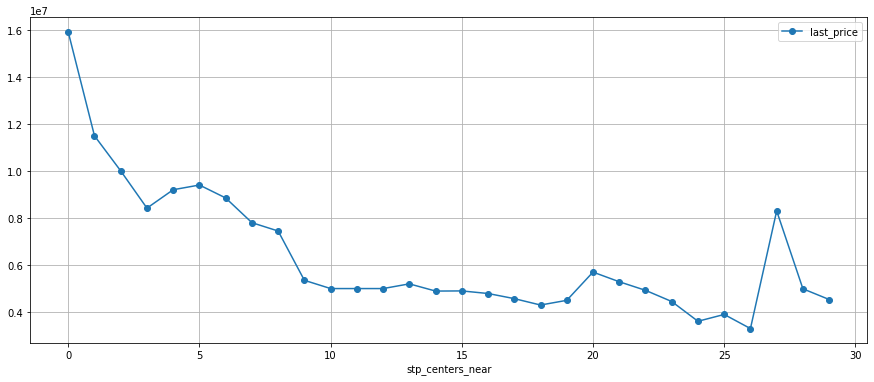

In [91]:
data_stp = data[data['locality_name'] == 'Санкт-Петербург']
data_stp['stp_centers_near']=round(data_stp['cityCenters_nearest']/1000)
(
   data_stp.pivot_table(index = 'stp_centers_near', values = 'last_price', aggfunc = 'median')
    .plot(style = 'o-',grid = True, figsize = (15,6))
)

На 3 и 9 км - падение графика. 28 км - подъем и далее снова падение. В центральную зону входят квартиры в радиусе 9 км.

<AxesSubplot:>

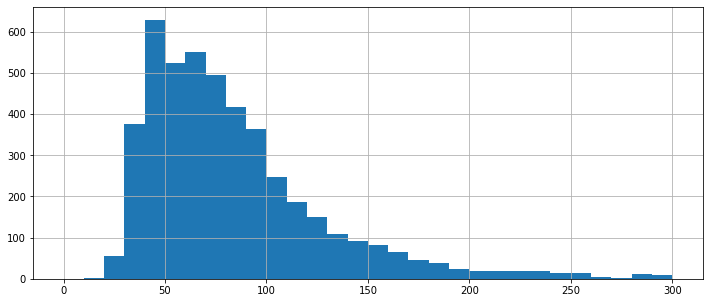

In [92]:
data_center = data_stp[data_stp['stp_centers_near'] <= 9]
data_center['total_area'].hist(bins = 30,range = (0, 300), figsize = (12,5))

**Вывод по объявлениям квартир в центре Санкт-Петербурга**: самый популярный метраж квартир в центре составляет 48м2, что значительно больше, чем в среднем по объявлениям (40м2).

<AxesSubplot:>

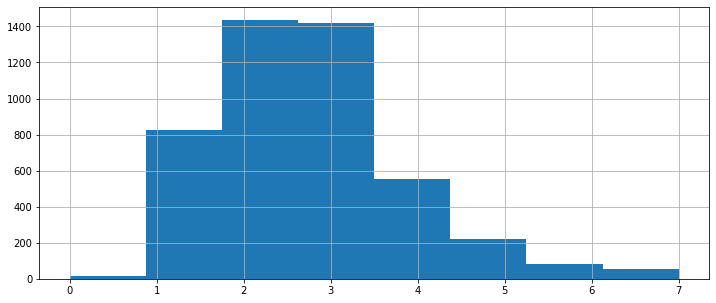

In [93]:
data_center['rooms'].hist(bins = 8, range = (0, 7), figsize = (12,5))

**Вывод по объявлениям квартир в центре Санкт-Петербурга**: чаще всего размещают объявления 2-х и 3-х комнатных квартир, реже - 1-комнатных. Что, в целом, коррелирует с общей ситуацией в регионе. 

<AxesSubplot:>

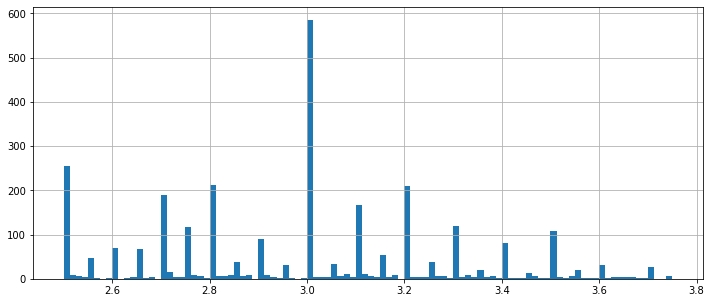

In [94]:
data_center['ceiling_height'].hist(bins = 100, range = (2.5, 3.75), figsize = (12,5))

**Вывод по объявлениям квартир в центре Санкт-Петербурга**: больше всего размещено объявлений с высотой потолка 3м. С большим отрывом позади квартиры с высотой потолка 2,5м и 3,2м. Напомним, в среднем, по региону больше всего размещено объявлений квартир с высотой потолка 2,5м. 

0.34383622740360514


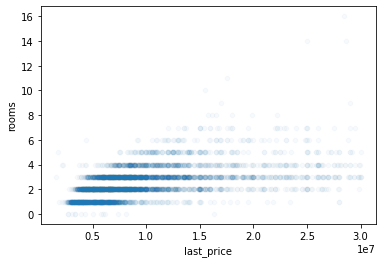

In [95]:
(
    data_center.query('last_price<30000000')
    .plot(x ='last_price',y ='rooms',kind = 'scatter',alpha = 0.03)
)
print(data_center['last_price'].corr(data_center['rooms']))

0.08466318905580444


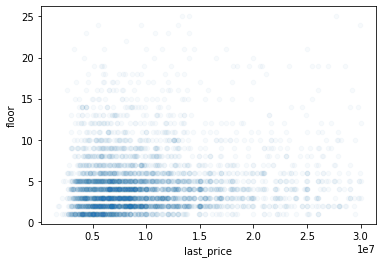

In [96]:
(
    data_center.query('last_price<30000000')
    .plot(x ='last_price',y ='floor', kind = 'scatter', alpha = 0.03)
)
print(data_center['last_price'].corr(data_center['floor']))

-0.12652510129237574


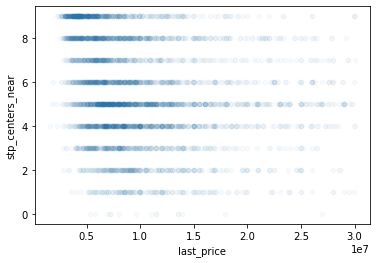

In [97]:
(
    data_center.query('last_price<30000000')
    .plot(x ='last_price',y = 'stp_centers_near', kind = 'scatter', alpha = 0.03)
)
print(data_center['last_price'].corr(data_center['stp_centers_near']))

<AxesSubplot:xlabel='last_price', ylabel='first_day_exposition'>

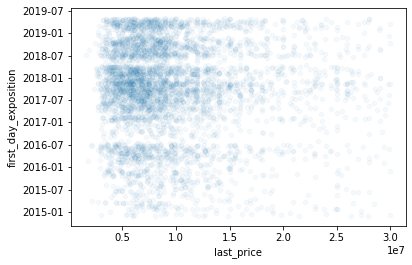

In [98]:
(
    data_center.query('last_price<30000000')
    .plot(x = 'last_price',y = 'first_day_exposition', kind = 'scatter', alpha = 0.04)
)

**Общий вывод по корреляции для квартир в центре Санкт-Петербурга**: цена на квартиры практически не зависит от числа комнат, удвленности от центра, этажа и даты размещения объявления. 

## Общий вывод

**В среднем по региону**: 
Наибольшее число объявлений предлагают квартиры:
- площадью 40 м2 (чуть меньше размещают квартиры площадью 30м2 и 60м2), 
- в ценовом диапазоне от 2 до 7 млн руб, 
- для 1- и 2- комнатных квартир (примерно по 8 тысяч), 3- комнатные квартиры представлены на рынку чуть меньше (почти 6 тысяч),
- с высотой потолка 2,5м (3,5 тысячи),

В среднем, объявления висят 233 дня, медиана - 119 дней. Норма для продажи квартиры - 119 дней, быстро - до 44 дней, медленно - дольше 296 дней. 50% объявлений попадают в диапазон от 44 до 294 дней.

Корреляция:
- между площадью квартиры и ее ценой существует, сила связи умеренная, зависимость прямая,
- между числом комнат в квартире и ее ценой практически не выражена, сила связи очень слабая, зависимость прямая,
- корреляция между расстоянием квартиры от центра города и ее ценой практически отсутствует, сила связи очень слабая/ отсутствует, зависимость обратная.

Квартиры на первом этаже самые дешевые (от 2,5 до 5 млн RUR, медиана - 4 млн RUR), на последнем - чуть дороже (от 3 до 6,5 млн RUR, медиана - 4,5 млн RUR). Квартиры, расположенные не на первом/ последнем этажах дороже (от 4 до 7 млн RUR, медиана - 5 млн RUR).

День размещения объявления практически не влияет на цену квартиры, но объявления на менее дешевые квартиры размещали в воскресенье, а на более дорогие - во вторник.
Более дорогие квартиры размещали в апреле и декабре (5 млн RUR), а менее дорогие - в июне и августе (4,8 млн RUR). 
Объявления на, в среднем, самые дорогие квартиры, размещались в 2014 году. Далее из года в год размещались объявления на все менее дорогие квартиры, и только в 2019 году тренд изменился, и цены в объявлениях пошли вверх. 

Цена 1м2 квартир в Санкт-Петербурге наиболее высокая и составляет, в среднем, 104591 RUR/1м2. На втором месте - Пушкин (99993 RUR/1м2). Бронза у Кудрово (95675 RUR/1м2). Самый дешевый квадратный метр в Выборге (58232 RUR/1м2).

*Самая популярная квартира*: площадь 40 м2, стоит 5 млн, 1/2 комнатная. Объявление будет висеть 119 дней. Дороже ее удастся продать, если этаж не первый и не последний, а сама она расположена в Санкт-Петербурге, Пушкине или Кудрове.   

**Санкт-Петербург (центр)**:
В центральную зону входят квартиры в радиусе 9 км.
Самый популярный метраж квартир в центре составляет 48м2, что значительно больше, чем в среднем по объявлениям (40м2).
Чаще всего размещаются объявления 2-х и 3-х комнатных квартир, реже - 1-комнатных. Что, в целом, коррелирует с общей ситуацией в регионе. 
Больше всего размещено объявлений с высотой потолка 3м. С большим отрывом позади квартиры с высотой потолка 2,5м и 3,2м. Напомним, в среднем, по региону больше всего размещено объявлений квартир с высотой потолка 2,5м. 
Цена на квартиры практически не зависит от числа комнат, удвленности от центра, этажа и даты размещения объявления. 